## Tarefa 2 - Modelo de Classificação em Python

Fazer um modelo de classificação para a variável “sobrevivência” na base de dados “Titanic” em Python. O modelo deve conter 4 variáveis preditoras.

A base de dados é a mesma da aula 4: “titanic3.csv”. Deve ser  usada uma parte para treino e outra para teste.

Pode ser usado tanto Análise de Regressão como Árvore de decisão.

Deve ser entregue um arquivo com o código em python e outro com um breve relatório onde é descrito o objetivo da modelagem, as variáveis utilizadas, a matriz de confusão, e o percentual de acurácia do modelo na base de teste.

Não é obrigatório, mas fica interessante o uso de gráficos.


# NOME: MARCIO DE LIMA

## Objetivo

Essa tarefa tem como objetivo a criação de um modelo de machine-learning de classificação que fará uma predição se um ou vários passageiros irão sobreviver ao incidente com o barco. Essa tarefa apresentará os fontes e os resultados passo a passo assim como gráficos e os resultados de acurária do modelo. 

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
# Importando o arquivo 
df = pd.read_csv('data/titanic3.csv')

In [9]:
df.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
#Tipagem dos campos
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
#Dados estatisticos - analise descritiva
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
# Visualizando as dimensões
df.shape

(1309, 14)

In [7]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

age          True
fare         True
cabin        True
embarked     True
boat         True
body         True
home.dest    True
dtype: bool

In [16]:
# Tratamento para os dados Missing
df['age'] = df['age'].fillna(df['age'].mean())
df['cabin'] = df['cabin'].fillna('C22')
df['embarked'] = df['embarked'].fillna('S')
df = df.fillna(0)
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,0.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,10,0.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,0,0.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,0.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,C22,C,0,22.0,"Montevideo, Uruguay"


In [17]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [18]:
#Tratamento da varíavel SEXO
df['sex'] = df['sex'].map(lambda x: 1 if x == 'female' else 0 )
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


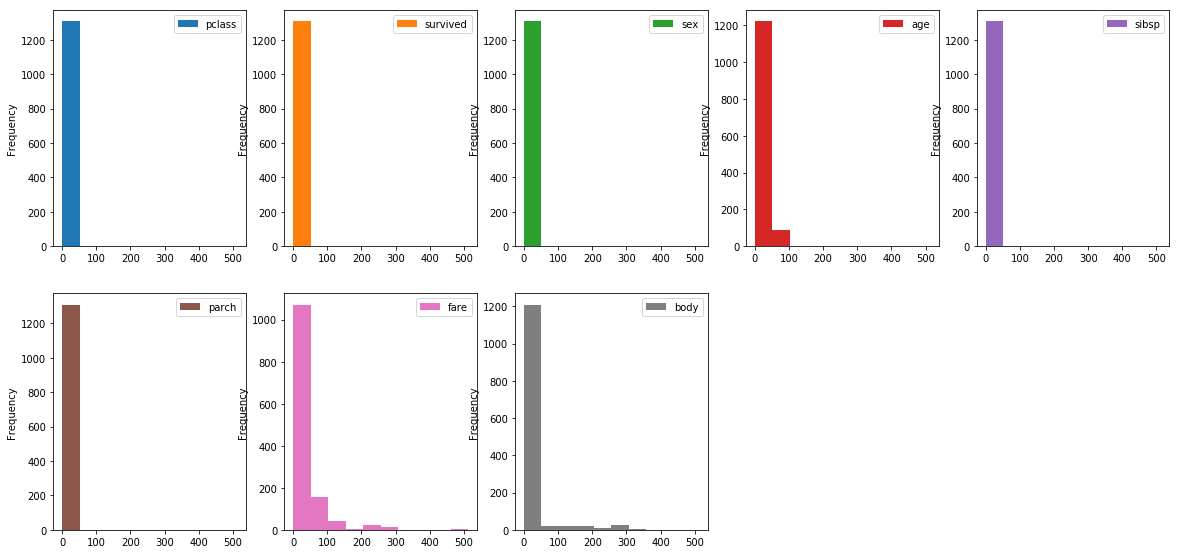

In [24]:
#Gerando gráficos para analise das variaveis

#Histogramas
df.plot(kind = 'hist', subplots = True, layout = (4,5), sharex = False, figsize=(20,20))
plt.show()

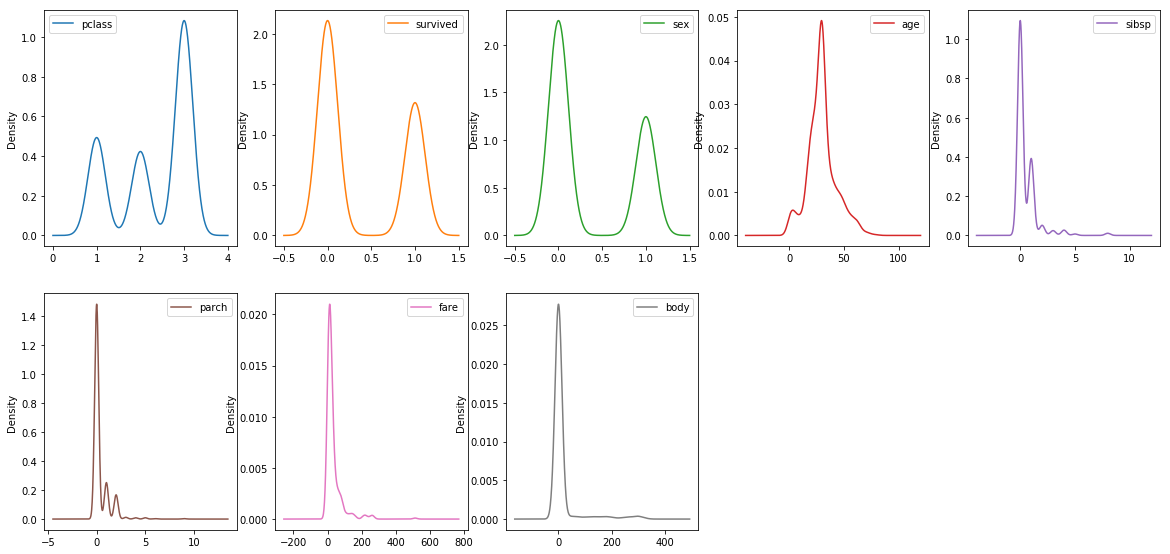

In [23]:
#Gráfico de Densidade
df.plot(kind = 'density', subplots = True, layout = (4,5), sharex = False, figsize=(20,20))
plt.show()

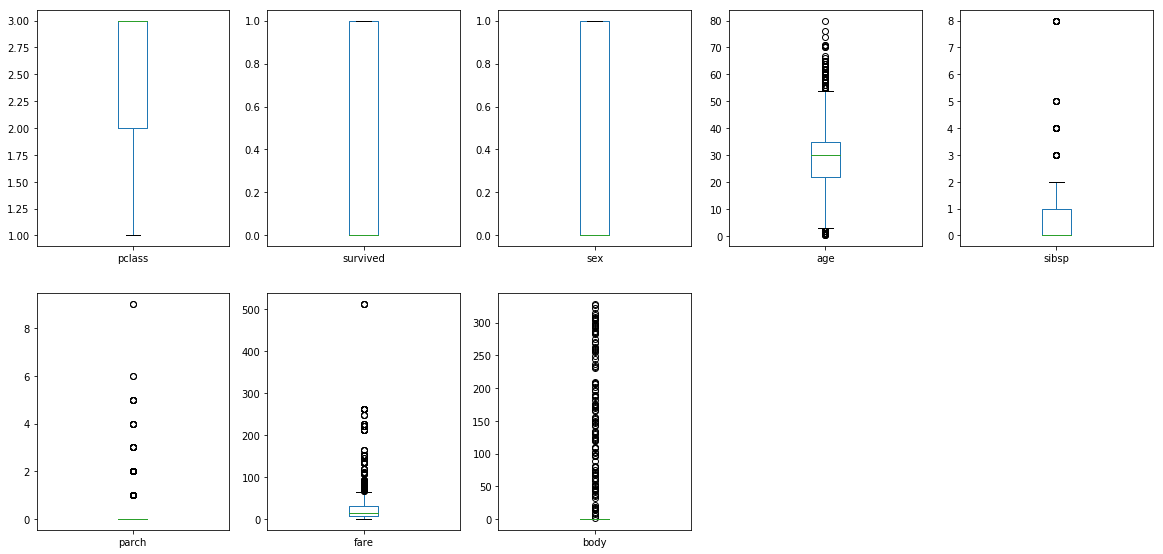

In [25]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (4,5), sharex = False, sharey = False, figsize=(20,20))
plt.show()

In [20]:
# Correlação de Pearson
df.corr(method = 'pearson')

,pclass,survived,sex,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.124617,-0.366371,0.060832,0.018322,-0.558803,-0.047393
survived,-0.312469,1.000000,0.528693,-0.050198,-0.027825,0.082660,0.244556,-0.211795
sex,-0.124617,0.528693,1.000000,-0.057397,0.109609,0.213125,0.185820,-0.161756
age,-0.366371,-0.050198,-0.057397,1.000000,-0.190747,-0.130872,0.170325,0.143353
sibsp,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160434,-0.053157
parch,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221706,-0.024257
fare,-0.558803,0.244556,0.185820,0.170325,0.160434,0.221706,1.000000,-0.014385
body,-0.047393,-0.211795,-0.161756,0.143353,-0.053157,-0.024257,-0.014385,1.000000


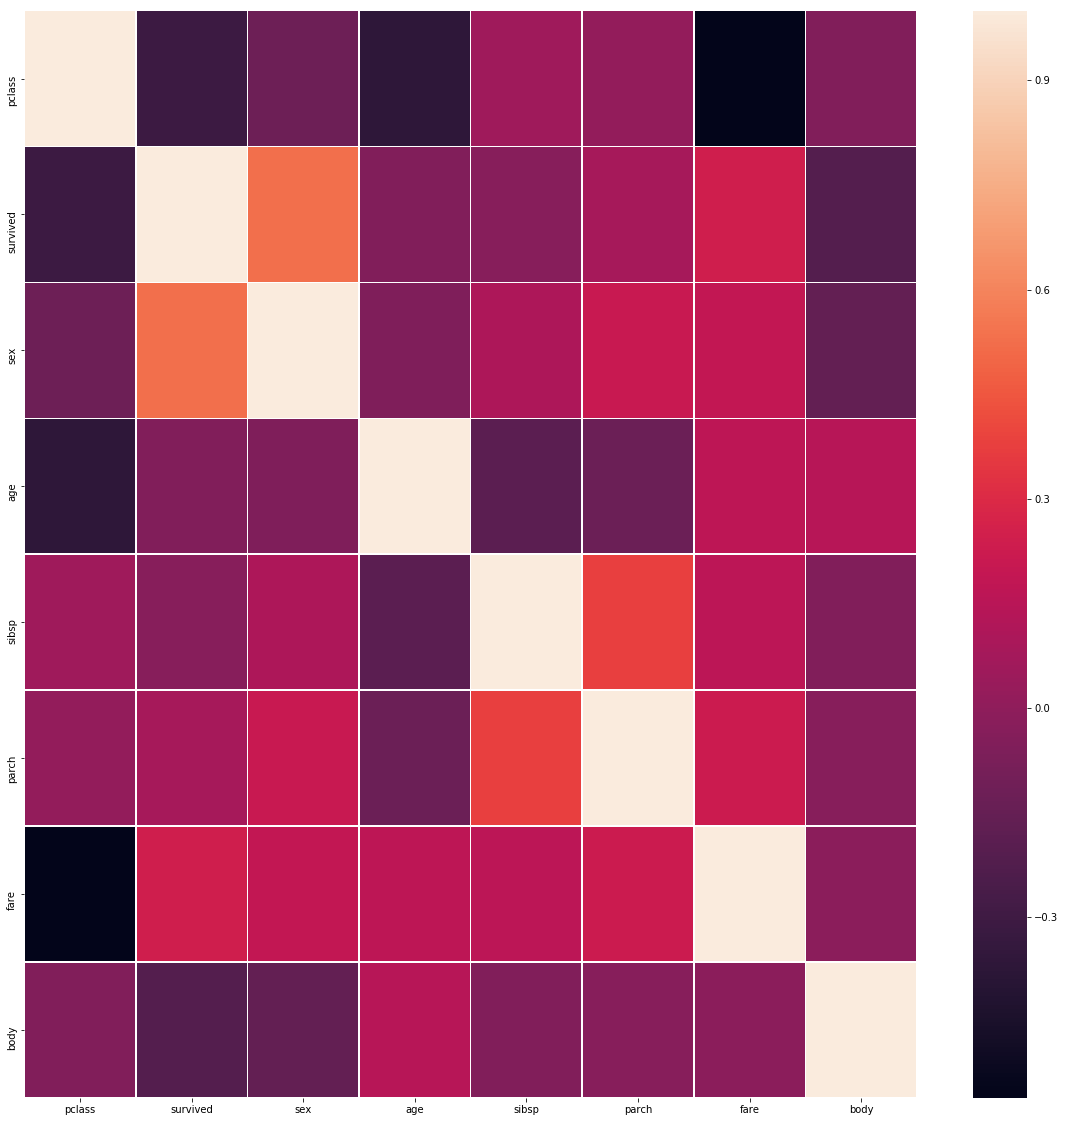

In [27]:
# Construindo um gráfico de HEATMAP
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),linewidths=.5, ax=ax)

## Escolha das varíaveis do modelo preditivo

Após análises das variáveis por correlação e análise descritiva e dos gráficos acima, foram escolhidas as varíaveis abaixo para o trabalho. 

São elas: 
    
    sex
    age
    pclass
    fare
    

In [63]:
#Gerando dados de Treino e de Teste para os modelos
from sklearn.model_selection import train_test_split

X = df.iloc[:,[0,3,4,8]]
Y = df.iloc[:,1]

seed = 1313
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.30, random_state = seed)

In [72]:
#Função utilitária
def plot_confusion_matrix(cm, title='Matriz de Confusao', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predição')
    plt.show

In [77]:
#Modelo - Versao 1
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, y_treino)

y_pred = modelo.predict(X_teste)

#Resultado do Modelo - Versao 1
resultado = modelo.score(X_teste, y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (resultado * 100.0))

Acurácia nos Dados de Teste: 79.135%


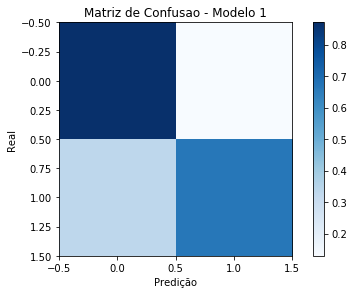

In [78]:
#Gerando a matriz de Confusao - Gráfico
cm= confusion_matrix(y_teste, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao - Modelo 1')

# Modelo 1 - LogisticRegression - Resultado => 79.13%

In [65]:
#Criando o modelo 2 - XGBClassifier
#!pip install xgboost
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

modelo2 = XGBClassifier(n_estimators=110, nthread=-1, seed=seed)

# Treinando o modelo
modelo2.fit(X_treino, y_treino, eval_metric="auc", verbose = False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=110, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=1313, silent=None, subsample=1, verbosity=1)

In [66]:
# Fazendo previsões
y_pred = modelo2.predict(X_teste)
previsoes = [round(value) for value in y_pred]


In [67]:
#Resultado do Modelo - Versao 2
resultado2 = accuracy_score(y_teste, previsoes)
print("Acuracia do Modelo 2: %.3f" % (resultado2 * 100.0))

Acuracia do Modelo 2: 78.372


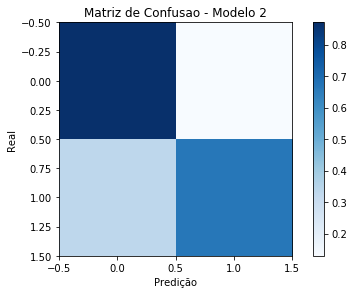

In [79]:
#Gerando a matriz de Confusao - Gráfico
cm= confusion_matrix(y_teste, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao - Modelo 2')

# Modelo 2 - XGBClassifier - Resultado => 78.37%

In [68]:
# Criando Modelo 3 - DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

modelo3 = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,
                                   min_samples_leaf=5)

#Treino
modelo3.fit(X_treino, y_treino)

#Predicoes
y_pred = modelo3.predict(X_teste)

In [69]:
#Resultado do Modelo - Versao 3
resultado3 = accuracy_score(y_teste, y_pred)
print("Acuracia do Modelo 3: %.3f" % (resultado3 * 100.0))

Acuracia do Modelo 3: 77.608


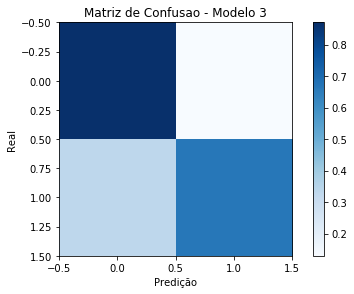

In [80]:
#Gerando a matriz de Confusao - Gráfico
cm= confusion_matrix(y_teste, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao - Modelo 3')


# Conclusão
O Melhor modelo (maior acurácia) foi o modelo 1 - Regressão Logística cujo resultado foi: 79.13%
Pela análise da matriz de confusão, percebemos que temos um melhor acerto nas predições de Não sobreviventes. A acurácia foi considerada satisfatória (acima de 75%). 

## FIM
## OBRIGADO